In [1]:
!conda update -n base -c defaults conda -y
!conda install -c anaconda fastparquet -y
!conda install -c conda-forge python-snappy -y

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.2.0=py36_3
done

## Package Plan ##

  environment location: /home/ec2-user/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py36_0           5 KB
    alabaster-0.7.12           |           py36_0          17 KB
    anaconda-custom            |           py36_1           3 KB
    anaconda-client-1.7.2      |           py36_0         141 KB
    anaconda-project-0.8.3     |             py_0         212 KB
    astroid-2.2.5              |           py36_0         275 KB
    astropy-3.2.1              |   py36h7b6447c_0         7.2 MB
    atomicwrites-1.3.0         |           py36_1          13 KB
    babel-2.7.0        

In [2]:
import pandas as pd
import fastparquet as fp
import s3fs
from matplotlib import pyplot as plt

In [3]:
s3=s3fs.S3FileSystem()
myopen=s3.open

In [18]:
s3_path = f"cleaning-data-column-filter/id=97/year=2019/month=5/day=9/*.parquet"
all_path = s3.glob(path=s3_path)
fp_obj = fp.ParquetFile(all_path, open_with=myopen)
df9 = fp_obj.to_pandas()

In [19]:
s3_path8 = f"cleaning-data-column-filter/id=97/year=2019/month=5/day=8/*.parquet"
all_path8 = s3.glob(path=s3_path8)
fp_obj8 = fp.ParquetFile(all_path8, open_with=myopen)
df8 = fp_obj8.to_pandas()

In [20]:
s3_path10 = f"cleaning-data-column-filter/id=97/year=2019/month=5/day=10/*.parquet"
all_path10 = s3.glob(path=s3_path10)
fp_obj10 = fp.ParquetFile(all_path10, open_with=myopen)
df10 = fp_obj10.to_pandas()

In [21]:
df8.shape, df9.shape, df10.shape

((84954, 372), (85969, 372), (86399, 372))

In [22]:
dfa = pd.concat([df8, df9, df10])

In [55]:
# data check
df97_may_smst = dfa[['alarm_value1','record_timestamp']].sort_values(by='record_timestamp')

In [57]:
df97_may_smst.shape

(257322, 2)

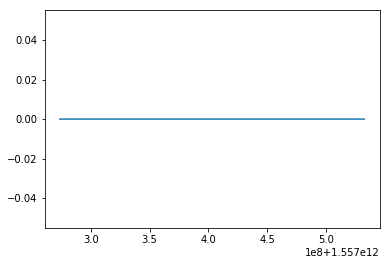

In [56]:
plt.plot(df97_may_smst['record_timestamp'], df97_may_smst['alarm_value1'])

In [93]:
dfa.shape

(257322, 372)

In [10]:
dfa.corr()
## Too many columns and hard to read it

,processing_time,record_timestamp,ainat160_value_d,ainbsc001_status1_value_d,ainct430_value_d,ainct450_value_d,ainextpowmeas_value_d,ainfan150control_value_d,ainft000hrm_value_d,ainft012_value_d,...,sys_planttimesec_i,unix_time_millis_utc_i,vsd110_output_d,vsd400_output_d,vsd800_output_d,vsd830_output_d,wstatenumber_i,year_i,cp_te001ft_d,cp_vsd451di_d
processing_time,1.000000,0.999903,0.821347,NaN,0.160215,-0.022266,0.262562,-0.063495,-0.009091,-0.130503,...,-0.000006,0.999903,-0.107586,-0.017504,-0.016144,-0.016144,-0.001099,NaN,NaN,NaN
record_timestamp,0.999903,1.000000,0.823901,NaN,0.155748,-0.030909,0.263610,-0.053333,-0.008814,-0.123202,...,0.000022,1.000000,-0.100182,-0.017552,-0.016203,-0.016203,-0.001138,NaN,NaN,NaN
ainat160_value_d,0.821347,0.823901,1.000000,NaN,0.215521,-0.193331,0.294309,0.157208,-0.018541,-0.105107,...,0.000519,0.823901,-0.068495,-0.056862,-0.053165,-0.053165,-0.046478,NaN,NaN,NaN
ainbsc001_status1_value_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ainct430_value_d,0.160215,0.155748,0.215521,NaN,1.000000,0.322198,0.026560,-0.415421,-0.029116,-0.871377,...,-0.000206,0.155748,-0.880799,-0.167087,-0.154371,-0.154371,-0.027514,NaN,NaN,NaN
ainct450_value_d,-0.022266,-0.030909,-0.193331,NaN,0.322198,1.000000,-0.063000,-0.789196,-0.031843,-0.474294,...,-0.000439,-0.030909,-0.490331,-0.078031,-0.071317,-0.071317,0.044442,NaN,NaN,NaN
ainextpowmeas_value_d,0.262562,0.263610,0.294309,NaN,0.026560,-0.063000,1.000000,0.036226,-0.005656,-0.012515,...,0.004543,0.263610,0.000641,0.020556,0.023533,0.023533,-0.001925,NaN,NaN,NaN
ainfan150control_value_d,-0.063495,-0.053333,0.157208,NaN,-0.415421,-0.789196,0.036226,1.000000,0.019787,0.690503,...,0.000810,-0.053333,0.728661,0.031601,0.027893,0.027893,-0.038748,NaN,NaN,NaN
ainft000hrm_value_d,-0.009091,-0.008814,-0.018541,NaN,-0.029116,-0.031843,-0.005656,0.019787,1.000000,0.030561,...,-0.001590,-0.008814,0.027711,0.003765,0.003699,0.003699,-0.002979,NaN,NaN,NaN
ainft012_value_d,-0.130503,-0.123202,-0.105107,NaN,-0.871377,-0.474294,-0.012515,0.690503,0.030561,1.000000,...,0.000952,-0.123202,0.954454,0.170168,0.157076,0.157076,0.029285,NaN,NaN,NaN


In [13]:
dfa.describe()
# many columns is meaningless including null or constant values

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/nanops.py:120: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/nanops.py:120: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/nanops.py:120: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/nanops.py:120: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/nanops.py:120: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/nanops.py:120: RuntimeWarning: Mean of empty sl

,processing_time,record_timestamp,ainat160_value_d,ainbsc001_status1_value_d,ainct430_value_d,ainct450_value_d,ainextpowmeas_value_d,ainfan150control_value_d,ainft000hrm_value_d,ainft012_value_d,...,sys_planttimesec_i,unix_time_millis_utc_i,vsd110_output_d,vsd400_output_d,vsd800_output_d,vsd830_output_d,wstatenumber_i,year_i,cp_te001ft_d,cp_vsd451di_d
count,2.558770e+05,2.558770e+05,255877.000000,255877.0,255877.000000,255877.000000,255877.000000,255877.000000,255877.000000,255877.000000,...,255877.000000,2.558770e+05,255877.000000,255877.000000,255877.000000,255877.000000,255877.000000,255877.0,0.0,0.0
mean,1.557346e+12,1.557345e+12,-4.530160,0.0,0.242821,0.121779,-1500.341458,4907.174318,-0.003276,75.719328,...,29.493987,1.557345e+12,0.916401,0.997299,0.997698,0.997698,20.011822,2019.0,NaN,NaN
std,4.808062e+07,4.804736e+07,3.620428,0.0,0.375992,0.007180,0.089814,53.733444,0.000516,23.154758,...,17.316674,4.804736e+07,0.276786,0.051896,0.047923,0.047923,6.929272,0.0,NaN,NaN
min,1.557274e+12,1.557274e+12,-24.957865,0.0,0.116222,0.110955,-1500.561768,4663.000000,-0.004494,0.000000,...,0.000000,1.557274e+12,0.000000,0.000000,0.000000,0.000000,5.000000,2019.0,NaN,NaN
25%,1.557306e+12,1.557306e+12,-6.976827,0.0,0.117978,0.119733,-1500.421387,4919.000000,-0.003371,82.609550,...,14.000000,1.557306e+12,1.000000,1.000000,1.000000,1.000000,20.000000,2019.0,NaN,NaN
50%,1.557338e+12,1.557338e+12,-6.969804,0.0,0.118329,0.120435,-1500.351074,4919.000000,-0.003371,83.091568,...,29.000000,1.557338e+12,1.000000,1.000000,1.000000,1.000000,20.000000,2019.0,NaN,NaN
75%,1.557383e+12,1.557382e+12,0.428370,0.0,0.147823,0.121840,-1500.210693,4919.000000,-0.002809,83.536514,...,44.000000,1.557382e+12,1.000000,1.000000,1.000000,1.000000,20.000000,2019.0,NaN,NaN
max,1.557447e+12,1.557446e+12,11.246488,0.0,2.071980,0.207514,-1500.070190,4919.000000,-0.001124,99.117180,...,59.000000,1.557446e+12,1.000000,1.000000,1.000000,1.000000,250.000000,2019.0,NaN,NaN


# delete NAN columns

In [23]:
mask = (dfa.isna().sum()>0)

In [24]:
m_df=pd.DataFrame(mask,columns=['TF'])

In [142]:
m_df.head()

,TF
processing_time,False
record_timestamp,False
datetime_iso8601_utc_s,False
ainat160_value_d,False
ainbsc001_status1_value_d,False


In [25]:
keep_list=m_df[m_df.TF==0].index

In [26]:
keep_list

Index(['processing_time', 'record_timestamp', 'datetime_iso8601_utc_s',
       'ainat160_value_d', 'ainbsc001_status1_value_d', 'ainct430_value_d',
       'ainct450_value_d', 'ainextpowmeas_value_d', 'ainfan150control_value_d',
       'ainft000hrm_value_d',
       ...
       'second_i', 'sstatenumber_i', 'sys_planttimesec_i',
       'unix_time_millis_utc_i', 'vsd110_output_d', 'vsd400_output_d',
       'vsd800_output_d', 'vsd830_output_d', 'wstatenumber_i', 'year_i'],
      dtype='object', length=306)

In [27]:
df_sm=dfa[(keep_list)]
df_sm.shape

(257322, 306)

# delete std==0 columns

In [28]:
mask2 = df_sm.std()==0

In [173]:
mask2.head()

processing_time              False
record_timestamp             False
ainat160_value_d             False
ainbsc001_status1_value_d     True
ainct430_value_d             False
dtype: bool

In [29]:
keep_list2 = mask2[mask2==0].index

In [175]:
keep_list2

Index(['processing_time', 'record_timestamp', 'ainat160_value_d',
       'ainct430_value_d', 'ainct450_value_d', 'ainextpowmeas_value_d',
       'ainfan150control_value_d', 'ainft000hrm_value_d', 'ainft012_value_d',
       'ainft140_value_d',
       ...
       'rstatenumber_i', 'second_i', 'sstatenumber_i', 'sys_planttimesec_i',
       'unix_time_millis_utc_i', 'vsd110_output_d', 'vsd400_output_d',
       'vsd800_output_d', 'vsd830_output_d', 'wstatenumber_i'],
      dtype='object', length=274)

In [30]:
df_sm2 = df_sm[(keep_list2)]

In [31]:
df_sm2.shape

(257322, 274)

In [102]:
from matplotlib import pyplot as plt

In [32]:
df_sm3=df_sm2.sort_values(by='record_timestamp')

In [110]:
df_sm3.head()

,processing_time,record_timestamp,ainat160_value_d,ainct430_value_d,ainct450_value_d,ainextpowmeas_value_d,ainfan150control_value_d,ainft000hrm_value_d,ainft012_value_d,ainft140_value_d,...,rstatenumber_i,second_i,sstatenumber_i,sys_planttimesec_i,unix_time_millis_utc_i,vsd110_output_d,vsd400_output_d,vsd800_output_d,vsd830_output_d,wstatenumber_i
0,1557273772932,1557273600049,-6.973314,0.118329,0.121489,-1500.210693,4919.0,-0.001685,82.782585,492.977539,...,160,0,60,13,1557273600049,1.0,1.0,1.0,1.0,20
2,1557273772932,1557273601048,-6.980337,0.118680,0.121840,-1500.421387,4919.0,-0.003371,82.835114,493.286530,...,160,1,60,14,1557273601048,1.0,1.0,1.0,1.0,20
4,1557273772932,1557273602045,-6.980337,0.119382,0.121840,-1500.210693,4919.0,-0.001685,82.711517,493.735992,...,160,2,60,15,1557273602045,1.0,1.0,1.0,1.0,20
6,1557273772932,1557273603045,-6.976827,0.118329,0.121840,-1500.351074,4919.0,-0.002809,82.458145,493.455078,...,160,3,60,16,1557273603045,1.0,1.0,1.0,1.0,20
8,1557273772932,1557273604045,-6.976827,0.118329,0.121840,-1500.421387,4919.0,-0.002809,82.170784,493.118011,...,160,4,60,17,1557273604045,1.0,1.0,1.0,1.0,20


In [108]:
df_sm3.duplicated().sum()

0

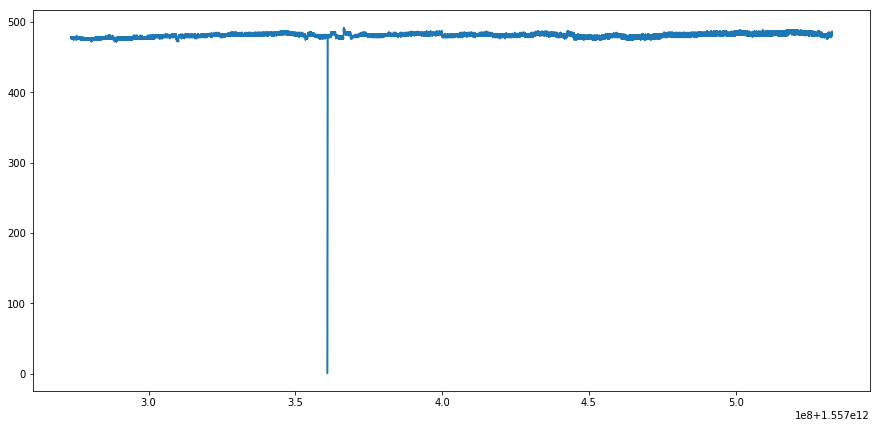

In [288]:
plt.figure(figsize=(15,7))
plt.plot(df_sm3['record_timestamp'],df_sm3['gridvalue'])
plt.show()


In [127]:
corr = df_sm3.corr()

In [128]:
corr.target_value_d.sort_values(ascending=False)

ainpcs_kwacnet_value_d          1.000000
ainpcs_ct001c_value_d           0.999486
ainpcs_ct001b_value_d           0.999447
ainpcs_ct001a_value_d           0.999401
cp_bairsd_d                     0.996989
cp_idcnorm_d                    0.996219
cp_idc_d                        0.996219
aoutejt010_value_d              0.995372
cp_kwdc_d                       0.994913
ainzt010_value_d                0.991635
aoutvsd110_value_d              0.989973
cp_eff_elec_d                   0.988076
ainft012_value_d                0.987398
ainpdt012_value_d               0.983609
cp_ft012eff_d                   0.979574
cp_ft012act_d                   0.979340
aoutfcv012_value_d              0.977823
ainvsd110curr_value_d           0.977800
cp_pfact_d                      0.962646
ainft140_value_d                0.960194
aoutvsd140_value_d              0.953061
cp_pdt110utilo2_d               0.948558
ainpcs_invvac_ca_value_d        0.942703
ainpcs_invvac_bc_value_d        0.942615
doutcv713_value_

In [135]:
corr.to_csv('corr_target.csv')

# Start and End value in DF comparison - EDA

In [ ]:
# To delete meaningless data where Start and End value is same

In [186]:
df_sm3.shape

(257322, 274)

In [272]:
df_s = df_sm3.iloc[:2000,]
df_e = df_sm3.iloc[255322:257322,]

In [206]:
df_s.mean()

processing_time                     1.557274e+12
record_timestamp                    1.557274e+12
ainat160_value_d                   -6.976299e+00
ainct430_value_d                    1.189642e-01
ainct450_value_d                    1.215274e-01
ainextpowmeas_value_d              -1.500350e+03
ainfan150control_value_d            4.919000e+03
ainft000hrm_value_d                -3.269704e-03
ainft012_value_d                    8.237287e+01
ainft140_value_d                    4.924705e+02
ainft490hrm_value_d                -9.200091e-01
ainft800hrm_value_d                -1.203350e+00
ainft880hrm_value_d                -1.202838e+00
ainjt101hrm_value_d                -2.505659e-03
ainjt102hrm_value_d                -3.966333e-03
ainlt400_value_d                    3.001709e-01
ainlt450_value_d                    7.655808e-01
ainpcs_acfrequency_value_d          6.000560e+01
ainpcs_ct001a_value_d               5.510911e+02
ainpcs_ct001b_value_d               5.209300e+02
ainpcs_ct001c_value_

In [207]:
df_e.mean()

processing_time                     1.557533e+12
record_timestamp                    1.557533e+12
ainat160_value_d                    4.420644e-01
ainct430_value_d                    1.214608e-01
ainct450_value_d                    1.221699e-01
ainextpowmeas_value_d              -1.500281e+03
ainfan150control_value_d            4.919000e+03
ainft000hrm_value_d                -3.230378e-03
ainft012_value_d                    8.312701e+01
ainft140_value_d                    4.936756e+02
ainft490hrm_value_d                -9.200259e-01
ainft800hrm_value_d                -1.203496e+00
ainft880hrm_value_d                -1.202838e+00
ainjt101hrm_value_d                -2.870828e-03
ainjt102hrm_value_d                -3.938243e-03
ainlt400_value_d                    2.995128e-01
ainlt450_value_d                    1.178251e+00
ainpcs_acfrequency_value_d          5.998928e+01
ainpcs_ct001a_value_d               5.458779e+02
ainpcs_ct001b_value_d               5.159150e+02
ainpcs_ct001c_value_

In [280]:
deviation = abs(df_s.mean())*1 - abs(df_e.mean())*1

In [281]:
deviation.to_csv('deviation_97_s_e.csv')


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


In [289]:
df_s_e = pd.concat([df_sm3.iloc[:10000,],df_sm3.iloc[247322:257322,]])


In [193]:
df_s_e.shape

(200, 274)

# By using graph, check whether they are some or not

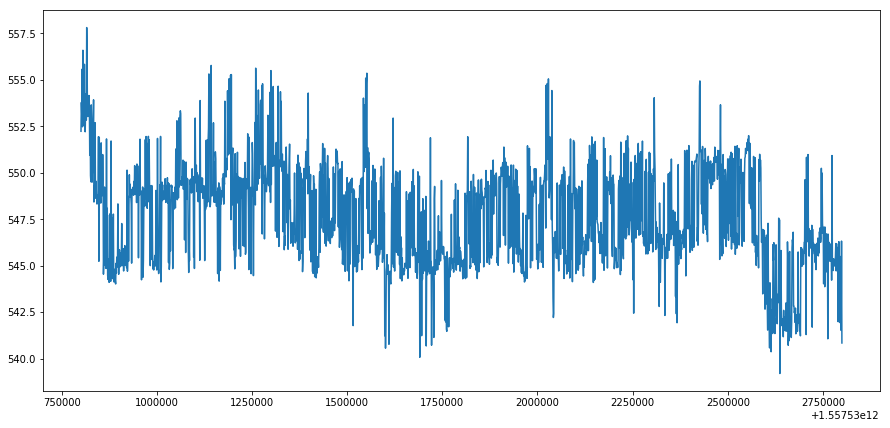

In [273]:
plt.figure(figsize=(15,7))
plt.plot(df_e['record_timestamp'],df_e['input_value2'])
plt.show()

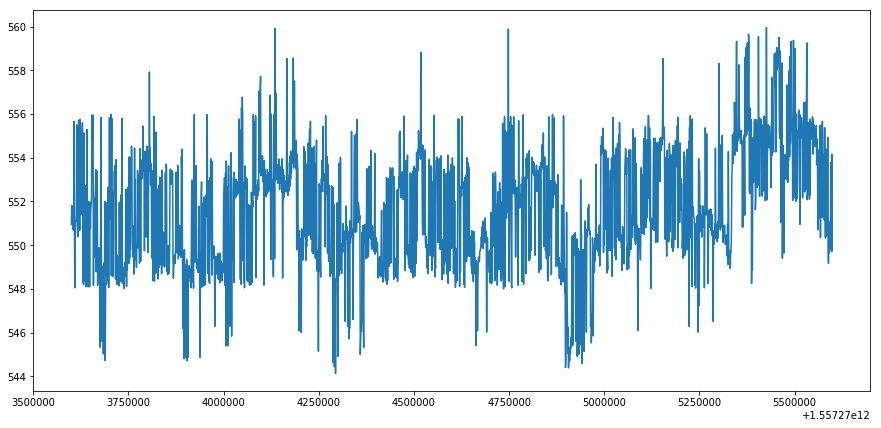

In [274]:
plt.figure(figsize=(15,7))
plt.plot(df_s['record_timestamp'],df_s['input_value2'])
plt.show()

# Chi-Square test for Bool Type columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 511 entries, processing_time to plantid
dtypes: bool(103), float64(370), int64(26), object(12)
memory usage: 33.0+ KB


In [18]:
df_bool_list = df.select_dtypes('bool').columns.tolist()

In [19]:
len(df_bool_list)

103

In [20]:
for i in df_bool_list:
    display(pd.crosstab(index=df[i], columns='% observations', normalize='columns'))

col_0,% observations
al_ct430_a_active_b,
False,1


col_0,% observations
al_ct430_b_active_b,
False,1


col_0,% observations
al_ct450_active_b,
False,1


col_0,% observations
al_cvsalarm_active_b,
False,1


col_0,% observations
bs_ct430_b,
False,1


col_0,% observations
bs_ct450_b,
False,1


col_0,% observations
bs_extpowmeas_b,
False,1


col_0,% observations
dinbc_sd_value_b,
False,1


col_0,% observations
dinburneron_value_b,
False,1


col_0,% observations
dincustnormsd_value_b,
False,1


col_0,% observations
dincv000status_value_b,
False,1


col_0,% observations
dinfs140_value_b,
False,1


col_0,% observations
dinfs160_value_b,
False,1


col_0,% observations
dinfs400_value_b,
True,1


col_0,% observations
dingfdbender_value_b,
True,1


col_0,% observations
dingfdmanifold_value_b,
False,1


col_0,% observations
dinheattracealarm_value_b,
False,1


col_0,% observations
dinindoorstatus_value_b,
True,1


col_0,% observations
dinloishutdown_value_b,
False,1


col_0,% observations
dinlorstatus_value_b,
False,0.1
True,0.9


col_0,% observations
dinlorstatusbit2_value_b,
False,1


col_0,% observations
dinlorstatusbit3_value_b,
False,1


col_0,% observations
dinpowersupplystatus_value_b,
True,1


col_0,% observations
dinps700_value_b,
False,1


col_0,% observations
dinpurge_value_b,
False,1


col_0,% observations
dinrack5status_value_b,
False,1


col_0,% observations
dinrack6status_value_b,
False,1


col_0,% observations
dints451_value_b,
True,1


col_0,% observations
dinupsstatus_value_b,
True,1


col_0,% observations
doutbc_en_value_b,
False,1


col_0,% observations
doutbc_reset_value_b,
False,1


col_0,% observations
doutblower110_value_b,
False,1


col_0,% observations
doutblower140_value_b,
False,1


col_0,% observations
doutcv001_value_b,
False,1


col_0,% observations
doutcv020_value_b,
False,1


col_0,% observations
doutcv130_value_b,
False,1


col_0,% observations
doutcv500_value_b,
False,1


col_0,% observations
doutcv550_value_b,
True,1


col_0,% observations
doutcv710_value_b,
True,1


col_0,% observations
doutcv711_value_b,
False,1


col_0,% observations
doutcv712_value_b,
False,1


col_0,% observations
doutcv713_value_b,
False,1


col_0,% observations
doutcv720_value_b,
True,1


col_0,% observations
doutfan151obs_value_b,
False,1


col_0,% observations
doutfan160_value_b,
False,1


col_0,% observations
doutfan800_value_b,
False,1


col_0,% observations
doutfcv430_value_b,
True,1


col_0,% observations
doutgimodecust_value_b,
False,1


col_0,% observations
doutheater400a_value_b,
False,1


col_0,% observations
doutheater400b_value_b,
False,1


col_0,% observations
doutheater400c_value_b,
False,1


col_0,% observations
doutheater400d_value_b,
False,1


col_0,% observations
douthgheatready_value_b,
False,1


col_0,% observations
doutindoorventfan_value_b,
False,1


col_0,% observations
doutlcv451_value_b,
False,1


col_0,% observations
doutlcv452_value_b,
False,1


col_0,% observations
doutlgheatready_value_b,
False,1


col_0,% observations
doutlorstatus_value_b,
False,0.4
True,0.6


col_0,% observations
doutpower002_value_b,
True,1


col_0,% observations
doutpump400_value_b,
True,1


col_0,% observations
doutpump450_value_b,
True,1


col_0,% observations
doutpump451_value_b,
False,1


col_0,% observations
doutpump830_value_b,
False,1


col_0,% observations
doutwdt1_value_b,
False,0.6
True,0.4


col_0,% observations
doutwdt2_value_b,
False,0.6
True,0.4


col_0,% observations
foldbackflag_b,
False,1


col_0,% observations
operin_wdt_reset_b,
False,1


col_0,% observations
opt_discprotflag_b,
False,1


col_0,% observations
pcs_auto_rtn_b,
False,1


col_0,% observations
pcs_currentunbalance_b,
False,1


col_0,% observations
pcs_d007overtemp_b,
False,1


col_0,% observations
pcs_dcgroundshifthi_b,
False,1


col_0,% observations
pcs_ecstempsensor_b,
False,1


col_0,% observations
pcs_ed_gc_obs_b,
False,1


col_0,% observations
pcs_ed_gi_obs_b,
False,1


col_0,% observations
pcs_fan150opwarn_b,
False,1


col_0,% observations
pcs_fastswitchovertemp_b,
False,1


col_0,% observations
pcs_fsw_error_obs_b,
False,1


col_0,% observations
pcs_generalwarning_b,
False,1


col_0,% observations
pcs_gridok_b,
True,1


col_0,% observations
pcs_inlettempsensor_b,
False,1


col_0,% observations
pcs_loadoverfreq_b,
False,1


col_0,% observations
pcs_loadovervoltage_b,
True,1


col_0,% observations
pcs_loadunderfreq_b,
False,1


col_0,% observations
pcs_loadundervoltage_b,
True,1


col_0,% observations
pcs_lowdcpower_b,
False,1


col_0,% observations
pcs_lowdcvoltage_b,
False,1


col_0,% observations
pcs_masterwarning_b,
False,1


col_0,% observations
pcs_modulehot_b,
False,1


col_0,% observations
pcs_notat100percent_b,
False,1


col_0,% observations
pcs_opencurrunbalance_b,
False,1


col_0,% observations
pcs_overloaded_b,
False,1


col_0,% observations
pcs_pcs100warning_b,
False,1


col_0,% observations
pcs_powernotmet_b,
False,1


col_0,% observations
pcs_sod152poswarn_b,
False,1


col_0,% observations
pcs_systemoverload_b,
False,1


col_0,% observations
pcs_undervoltdisconn_b,
False,1


col_0,% observations
pcs_voltageunbalance_b,
False,1


col_0,% observations
pcs_zeroseqvolthigh_b,
False,1


col_0,% observations
sd_ct430_a_active_b,
False,1


col_0,% observations
sd_ct430_b_active_b,
False,1


col_0,% observations
sd_ct450_active_b,
False,1


col_0,% observations
sd_custnormsd_active_b,
False,1
